<h1> Imports </h1>

In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from tensorflow.keras import layers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras import backend as K
from google.colab import drive
drive.mount('/content/drive')
from tensorflow import keras
from seaborn import heatmap
from matplotlib import cm
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools
import random
import torch
import cv2
import os

Mounted at /content/drive


<h1> Read Train and Test sets </h1>

In [2]:
# Rescale = ImageDataGenerator(rescale=1./255,
#                             rotation_range=40,horizontal_flip=True,zoom_range=0.2,height_shift_range=0.2,width_shift_range=0.2,fill_mode='nearest')
# train_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/train',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical',
#                                           shuffle=True)


# test_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/train',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical', shuffle=True)

# val_ds =Rescale.flow_from_directory('drive/MyDrive/Splited_Data_Sample/val',
#                                           target_size=(150,150),
#                                           batch_size=25,
#                                           class_mode='categorical', shuffle=True)

In [3]:
def plot_perfomance(history_num):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(history_num.history['loss'],'r')
    plt.plot(history_num.history['val_loss'],'b')
    plt.title('Loss',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.legend(('loss','val_loss'))
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history_num.history['accuracy'],'r')
    plt.plot(history_num.history['val_accuracy'],'b')
    plt.ylim([0, 1])
    plt.legend(('accuracy','val_accuracy'))
    plt.title('Accuracy',fontsize=12)
    plt.xlabel('Epochs',fontsize=12)
    plt.grid()

In [6]:

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'drive/MyDrive/Splited_Data_Sample/train'
validation_data_dir = 'drive/MyDrive/Splited_Data_Sample/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

vgg_model = tf.keras.applications.VGG19(
           include_top=False, input_shape=((150, 150, 3)))

model = Sequential(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

loss_kind = 'categorical_crossentropy'
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

model.compile(loss=loss_kind,
              optimizer=opt,
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 12)                3084      
                                                                 
Total params: 22,124,876
Trainable params: 22,124,876
Non-trainable params: 0
_________________________________________________________________
Found 4559 images belonging to 12 classes.

In [7]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=30)
model.save_weights('weights.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
30/30 [==============================] - 282s 9s/step - loss: 2.6707 - accuracy: 0.1167 - val_loss: 2.1917 - val_accuracy: 0.2125
Epoch 2/100
30/30 [==============================] - 217s 7s/step - loss: 2.2723 - accuracy: 0.2250 - val_loss: 2.1218 - val_accuracy: 0.2583
Epoch 3/100
30/30 [==============================] - 173s 6s/step - loss: 2.1970 - accuracy: 0.2708 - val_loss: 2.0404 - val_accuracy: 0.2979
Epoch 4/100
30/30 [==============================] - 140s 5s/step - loss: 2.1075 - accuracy: 0.2750 - val_loss: 1.9399 - val_accuracy: 0.4104
Epoch 5/100
30/30 [==============================] - 106s 4s/step - loss: 1.9564 - accuracy: 0.3562 - val_loss: 1.8000 - val_accuracy: 0.4167
Epoch 6/100
30/30 [==============================] - 128s 4s/step - loss: 1.9177 - accuracy: 0.3695 - val_loss: 1.6328 - val_accuracy: 0.4708
Epoch 7/100
30/30 [==============================] - 85s 3s/step - loss: 1.7602 - accuracy: 0.4208 - val_loss: 1.5478 - val_accuracy: 0.4688
Epoch 8

In [ ]:
# AFTER 19 EPOCHS THE VALֹֹ_ACCURACY reached 66 %

In [8]:
model.save_weights('weights.h5')

In [9]:
model.save_weights("drive/MyDrive/Splited_Data_Sample/model_weights.h5")

In [ ]:
torch.save(model.save, 'drive/MyDrive/Splited_Data_Sample/get_weights.pth')

In [21]:
torch.save(model.save, 'drive/MyDrive/Splited_Data_Sample/model_sab.pth')

INFO:tensorflow:Assets written to: ram://53e779a4-ff2d-4b33-9b0b-28f01c8d5a4d/assets


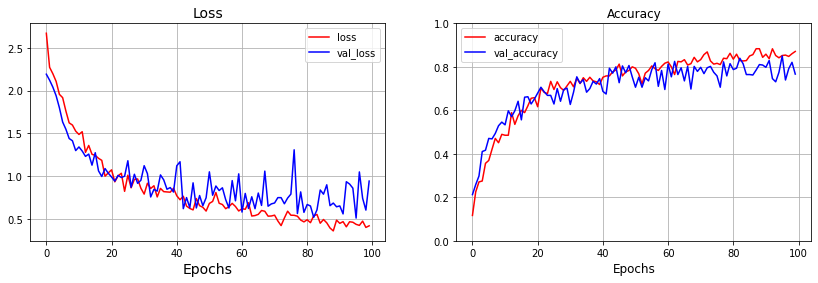

In [20]:
plot_perfomance(history)